# Brain Tumor Detection using CNN
A CNN model to classify brain tumor MRI images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:

# Set dataset paths
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/brain/train'
val_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/brain/val'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/brain/test'


In [ ]:

img_size = (128, 128)

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path, target_size=img_size, batch_size=32, class_mode='binary')
test_generator = val_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=1, class_mode='binary', shuffle=False)


Found 253 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(train_generator, validation_data=val_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6333 - loss: 0.6887 - val_accuracy: 0.7413 - val_loss: 0.5740
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7296 - loss: 0.5597 - val_accuracy: 0.7811 - val_loss: 0.5054
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7356 - loss: 0.5828 - val_accuracy: 0.7512 - val_loss: 0.5619
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7674 - loss: 0.5198 - val_accuracy: 0.7761 - val_loss: 0.5030
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8092 - loss: 0.4379 - val_accuracy: 0.8159 - val_loss: 0.4499
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7727 - loss: 0.4540 - val_accuracy: 0.8010 - val_loss: 0.4041
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7964 - loss: 0.4600 - val_accuracy: 0.8010 - val_loss: 0.4511
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7886 - loss: 0.4550 - val_accuracy: 0.8557 - val_loss: 0.3488
Epoch 9/

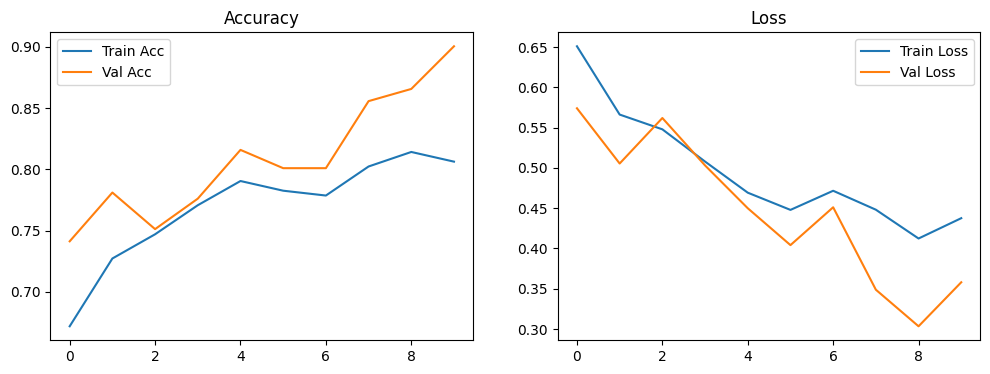

In [ ]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        14
           1       1.00      0.85      0.92        52

    accuracy                           0.88        66
   macro avg       0.82      0.92      0.85        66
weighted avg       0.92      0.88      0.89        66



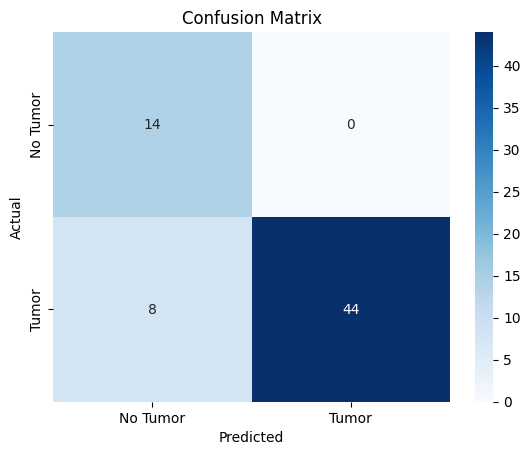

In [ ]:

y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred))

conf_mat = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


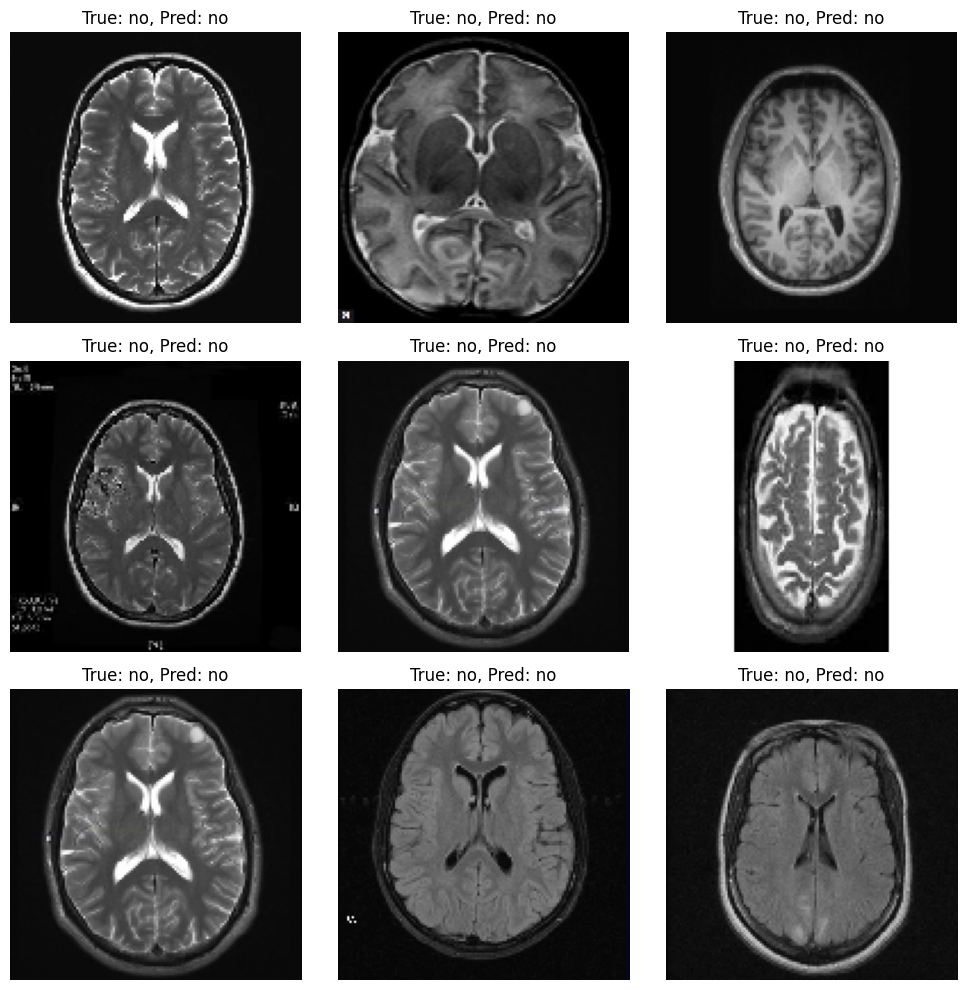

In [ ]:
class_labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = next(test_generator)
    pred = model.predict(img)[0][0]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.title(f"True: {class_labels[int(label[0])]}, Pred: {class_labels[int(pred > 0.5)]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.upload()


Saving Y8.jpg to Y8 (1).jpg


{'Y8 (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x00^Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x03\x02\x00\x02\x00\x00\x00\x0c\x00\x00\x00JQ\x10\x00\x01\x00\x00\x00\x01\x01\x00\x00\x00Q\x11\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00Q\x12\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00ICC Profile\x00\xff\xe2\n ICC_PROFILE\x00\x01\x01\x00\x00\n\x10\x00\x00\x00\x00\x02\x10\x00\x00mntrRGB XYZ \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd5\x00\x01\x00\x00\x00\x00\xd3,\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00|cprt\x00\x00\x01x\x00\x00\x00(wtpt\x00\x00\x01\xa0\x00\x00\x00\x14bkpt\x00\x00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


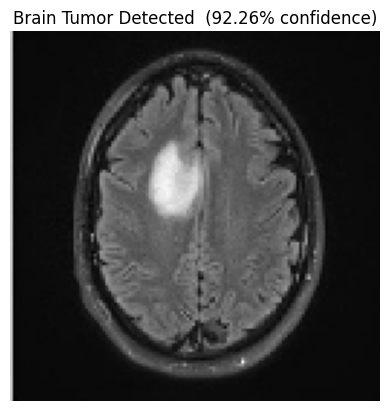

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Path to the uploaded/test image
img_path = 'Y8.jpg'  # You can change this to the path of your image

# 1. Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))  # Match model input size
img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 128, 128, 3)

# 2. Make prediction
prediction = model.predict(img_array)[0][0]

# 3. Interpret result
if prediction > 0.5:
    label = "Brain Tumor Detected "
else:
    label = "No Brain Tumor Detected"
    confidence = prediction
    confidence = 1 - prediction

# 4. Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"{label} ({confidence*100:.2f}% confidence)")
plt.show()
